## The Life Expectancy and Income
_by Mohammad Fazlan bin Harun_

About the dataset:

Data source : https://databank.worldbank.org/source/world-development-indicators

Database: World Development Indicators  
Countries: check all "Countries" (not All or Aggregates)  
Series: Life expectancy at birth, total (years) [SP.DYN.LE00.IN]    
          Population, total [SP.POP.TOTL]    
        GDP per capita, PPP (current international $)(NY.GDP.PCAP.PP.CD)      
Time:   check all years

layout > orientation > popular > Orientation 4 ( Series on page, Time on Column, Country on Row)

Life expectancy at birth, total (years)   
-indicates the number of years a newborn infant would live if prevailing patterns of mortality at the time of its birth were to stay the same throughout its life.  
-Life expectancy at birth used here is the average number of years a newborn is expected to live if mortality patterns at the time of its birth remain constant in the future. It reflects the overall mortality level of a population, and summarizes the mortality pattern that prevails across all age groups in a given year.

Population   
-total is based on the de facto definition of population, which counts all residents regardless of legal status or citizenship. The values shown are mid-year estimates.	

GDP per capita, PPP (current international $)	
-This indicator provides per capita values for gross domestic product (GDP) expressed in current international dollars converted by purchasing power parity (PPP) conversion factor. 
GDP is the sum of gross value added by all resident producers in the country plus any product taxes and minus any subsidies not included in the value of the products.

In [1]:
#importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")
%matplotlib inline
sns.set()

In [2]:
#loading data

data = pd.read_csv('Data_WB_Life_Expectancy.csv')
data.head(10)

,Time,Time Code,Country Name,Country Code,"Life expectancy at birth, total (years) [SP.DYN.LE00.IN]","Population, total [SP.POP.TOTL]","GDP per capita, PPP (current international $) [NY.GDP.PCAP.PP.CD]"
0,1960,YR1960,Afghanistan,AFG,32.446,8996967,..
1,1960,YR1960,Albania,ALB,62.283,1608800,..
2,1960,YR1960,Algeria,DZA,46.141,11057864,..
3,1960,YR1960,American Samoa,ASM,..,20127,..
4,1960,YR1960,Andorra,AND,..,13410,..
5,1960,YR1960,Angola,AGO,37.524,5454938,..
6,1960,YR1960,Antigua and Barbuda,ATG,61.968,54132,..
7,1960,YR1960,Argentina,ARG,65.055,20481781,..
8,1960,YR1960,Armenia,ARM,65.972,1874119,..
9,1960,YR1960,Aruba,ABW,65.662,54208,..


We can see the GDP per capita column has a null values which we should handle later on.

In [3]:
print('List of columns :')
data.columns.to_list()

List of columns :


['Time',
 'Time Code',
 'Country Name',
 'Country Code',
 'Life expectancy at birth, total (years) [SP.DYN.LE00.IN]',
 'Population, total [SP.POP.TOTL]',
 'GDP per capita, PPP (current international $) [NY.GDP.PCAP.PP.CD]']

In [4]:
print(f'There are {data.shape[0]} rows and {data.shape[1]} columns in this dataset.')

There are 13454 rows and 7 columns in this dataset.


In [5]:
#renaming column 

data.rename(
    columns={
        'Time':'Year',
        'GDP per capita, PPP (current international $) [NY.GDP.PCAP.PP.CD]':'GDP_per_capita',
        'Population, total [SP.POP.TOTL]':'Population',
        'Life expectancy at birth, total (years) [SP.DYN.LE00.IN]':'Life_expectancy'
    },inplace=True)

data.head(2)

,Year,Time Code,Country Name,Country Code,Life_expectancy,Population,GDP_per_capita
0,1960,YR1960,Afghanistan,AFG,32.446,8996967,..
1,1960,YR1960,Albania,ALB,62.283,1608800,..


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13454 entries, 0 to 13453
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Year             13454 non-null  int64 
 1   Time Code        13454 non-null  object
 2   Country Name     13454 non-null  object
 3   Country Code     13454 non-null  object
 4   Life_expectancy  13454 non-null  object
 5   Population       13454 non-null  object
 6   GDP_per_capita   13454 non-null  object
dtypes: int64(1), object(6)
memory usage: 735.9+ KB


The life expectancy, population and GDP per capita column should have a numeric type of data instead of object. We neeed to change it to numeric data type later.

In [7]:
#check for missing values

data.isna().sum()

Year               0
Time Code          0
Country Name       0
Country Code       0
Life_expectancy    0
Population         0
GDP_per_capita     0
dtype: int64

It is weird to see no missing values when we certainly know GDP per capita column has a missing values maybe the mising values is denotd by '..' ,let's check.

In [8]:
((data['GDP_per_capita'])=='..').sum()

7684

In [9]:
(data=='..').sum()

Year                  0
Time Code             0
Country Name          0
Country Code          0
Life_expectancy    1524
Population          259
GDP_per_capita     7684
dtype: int64

In [10]:
#now we know missing values is represented by '..', let delete them.

data= data.replace("..", np.nan)
(data=='..').sum()

Year               0
Time Code          0
Country Name       0
Country Code       0
Life_expectancy    0
Population         0
GDP_per_capita     0
dtype: int64

In [11]:
#change object datatype to numeric

data= data.assign(
    Population = pd.to_numeric(data.Population),
    GDP_per_capita = pd.to_numeric(data.GDP_per_capita),
    Life_expectancy = pd.to_numeric(data.Life_expectancy)
)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13454 entries, 0 to 13453
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Year             13454 non-null  int64  
 1   Time Code        13454 non-null  object 
 2   Country Name     13454 non-null  object 
 3   Country Code     13454 non-null  object 
 4   Life_expectancy  11930 non-null  float64
 5   Population       13195 non-null  float64
 6   GDP_per_capita   5770 non-null   float64
dtypes: float64(3), int64(1), object(3)
memory usage: 735.9+ KB


In [12]:
data.isnull().sum()

Year                  0
Time Code             0
Country Name          0
Country Code          0
Life_expectancy    1524
Population          259
GDP_per_capita     7684
dtype: int64

In [13]:
data.dropna(inplace=True)
data.isnull().sum()

Year               0
Time Code          0
Country Name       0
Country Code       0
Life_expectancy    0
Population         0
GDP_per_capita     0
dtype: int64

In [14]:
data['Population (million)'] = data['Population']/1000000
data['GDP_per_capita (thousand)'] = data['GDP_per_capita']/1000
data.drop(columns=['GDP_per_capita','Population','Time Code'],inplace=True)
data.set_index('Country Code',inplace = True)
data.head()

,Year,Country Name,Life_expectancy,Population (million),GDP_per_capita (thousand)
Country Code,,,,,
ALB,1990,Albania,71.836,3.286542,2.548112
DZA,1990,Algeria,66.938,25.758872,6.912087
AGO,1990,Angola,45.306,11.848385,3.279222
ATG,1990,Antigua and Barbuda,71.520,0.062533,11.586780
ARG,1990,Argentina,71.594,32.618648,7.191105


In [15]:
# let select latest year data to analyze

df = data[(data['Year'] == 2020)]
df.head()

,Year,Country Name,Life_expectancy,Population (million),GDP_per_capita (thousand)
Country Code,,,,,
AFG,2020,Afghanistan,65.173,38.928341,2.078649
ALB,2020,Albania,78.686,2.837849,13.412097
DZA,2020,Algeria,77.063,43.851043,11.324236
AGO,2020,Angola,61.487,32.866268,6.445433
ATG,2020,Antigua and Barbuda,77.146,0.097928,18.241868


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 181 entries, AFG to ZWE
Data columns (total 5 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Year                       181 non-null    int64  
 1   Country Name               181 non-null    object 
 2   Life_expectancy            181 non-null    float64
 3   Population (million)       181 non-null    float64
 4   GDP_per_capita (thousand)  181 non-null    float64
dtypes: float64(3), int64(1), object(1)
memory usage: 8.5+ KB


In [17]:
# Data transformed by taking the natural logarithm, differences in natural logs show percentage differences.
df["log_gdp"] = np.log(df["GDP_per_capita (thousand)"])
df.head(10)

,Year,Country Name,Life_expectancy,Population (million),GDP_per_capita (thousand),log_gdp
Country Code,,,,,,
AFG,2020,Afghanistan,65.173000,38.928341,2.078649,0.731718
ALB,2020,Albania,78.686000,2.837849,13.412097,2.596157
DZA,2020,Algeria,77.063000,43.851043,11.324236,2.426945
AGO,2020,Angola,61.487000,32.866268,6.445433,1.863372
ATG,2020,Antigua and Barbuda,77.146000,0.097928,18.241868,2.903719
ARG,2020,Argentina,76.813000,45.376763,20.770726,3.033545
ARM,2020,Armenia,75.224000,2.963234,13.312114,2.588674
AUS,2020,Australia,83.200000,25.693267,53.316885,3.976253
AUT,2020,Austria,81.192683,8.916864,55.685970,4.019728


In [18]:
#let see descriptive statistics of the dataset

df.describe()

,Year,Life_expectancy,Population (million),GDP_per_capita (thousand),log_gdp
count,181.0,181.000000,181.000000,181.000000,181.000000
mean,2020.0,72.790470,42.011304,21.229429,2.488824
std,0.0,7.335254,151.433769,21.837967,1.154214
min,2020.0,53.679000,0.063903,0.771163,-0.259855
25%,2020.0,67.561000,2.351625,5.123826,1.633901
50%,2020.0,74.213000,8.947027,13.069176,2.570256
75%,2020.0,77.928000,31.255435,31.482680,3.449438
max,2020.0,85.387805,1410.929362,117.846137,4.769380


In [19]:
life_expectancy_Malaysia2020 = df[(df['Country Name'] == 'Malaysia')]
life_expectancy_Malaysia2020

,Year,Country Name,Life_expectancy,Population (million),GDP_per_capita (thousand),log_gdp
Country Code,,,,,,
MYS,2020,Malaysia,76.306,32.365998,27.923688,3.329475


Average life expectancy across the 181 countries in 2020 is 73 years, with a range of 54 to 86 years old. Thus, there is substantial variation in the average length of life across countries. For a comparison to Malaysia (my country), Malaysia is at the upper half of the range where Malaysian residents expected to live around 76-years-old and 3 months.

In [20]:
sorted_by_life_expectancy = df.sort_values(by=['Life_expectancy'])

print('Countries with the lowest life expectancy are from :')
(sorted_by_life_expectancy [['Country Name','Life_expectancy']]).head()

Countries with the lowest life expectancy are from :


,Country Name,Life_expectancy
Country Code,,
CAF,Central African Republic,53.679
TCD,Chad,54.505
LSO,Lesotho,54.836
NGA,Nigeria,55.018
SLE,Sierra Leone,55.066


In [21]:
print('''Countries with the highest life expectancy are from East Asian countries and South East Asian (Singapore)''')
sorted_by_life_expectancy [['Country Name','Life_expectancy']].tail()

Countries with the highest life expectancy are from East Asian countries and South East Asian (Singapore)


,Country Name,Life_expectancy
Country Code,,
KOR,"Korea, Rep.",83.426829
SGP,Singapore,83.743902
MAC,"Macao SAR, China",84.370000
JPN,Japan,84.615610
HKG,"Hong Kong SAR, China",85.387805


### Figure 1: The distribution of GDP per capita

(a) Histogram of GDP per capita

Text(0, 0.5, 'Frequency')

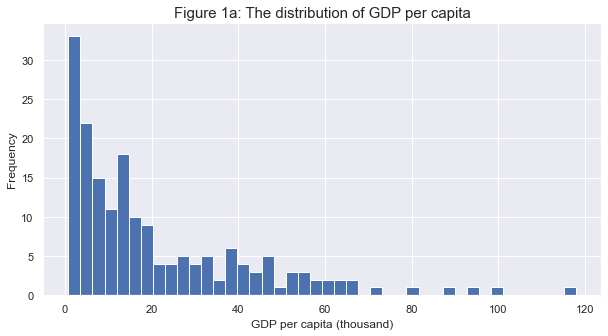

In [22]:
df['GDP_per_capita (thousand)'].hist(figsize=(10,5),bins=42,)
plt.title("Figure 1a: The distribution of GDP per capita", fontsize=15) 
plt.xlabel("GDP per capita (thousand)", fontsize=12) 
plt.ylabel("Frequency", fontsize=12)  

The distribution of GDP per capita is skewed with a long right tail, Figure 1a shows its histogram. There are 6 countries with extremely high GDP per capita values. Let's see which countries are they.

In [23]:
sorted_by_gdppc = df.sort_values(by=['GDP_per_capita (thousand)'],ascending=False)
sorted_by_gdppc.head(6)

,Year,Country Name,Life_expectancy,Population (million),GDP_per_capita (thousand),log_gdp
Country Code,,,,,,
LUX,2020,Luxembourg,81.741463,0.630419,117.846137,4.769380
SGP,2020,Singapore,83.743902,5.685807,98.520030,4.590260
IRL,2020,Ireland,82.204878,4.985674,93.350088,4.536357
QAT,2020,Qatar,80.363000,2.881060,89.968771,4.499463
BMU,2020,Bermuda,82.056098,0.063903,80.829617,4.392343
CHE,2020,Switzerland,83.100000,8.636561,71.745299,4.273122


There are 6 countries with extremely high GDP per capita: Luxembourg, Singapore, Ireland, Qatar,Bermuda and Switzerland.

In [24]:
sorted_by_gdppc.describe()

,Year,Life_expectancy,Population (million),GDP_per_capita (thousand),log_gdp
count,181.0,181.000000,181.000000,181.000000,181.000000
mean,2020.0,72.790470,42.011304,21.229429,2.488824
std,0.0,7.335254,151.433769,21.837967,1.154214
min,2020.0,53.679000,0.063903,0.771163,-0.259855
25%,2020.0,67.561000,2.351625,5.123826,1.633901
50%,2020.0,74.213000,8.947027,13.069176,2.570256
75%,2020.0,77.928000,31.255435,31.482680,3.449438
max,2020.0,85.387805,1410.929362,117.846137,4.769380


Average GDP per capita is 21k US dollars in this data, the median is 13k US dollars, which also shows the skewness of the distribution. The standard deviation is 21k US dollars, suggesting substantial spread.

(b) Histogram of log (GDP per capita)

Text(0, 0.5, 'Frequency')

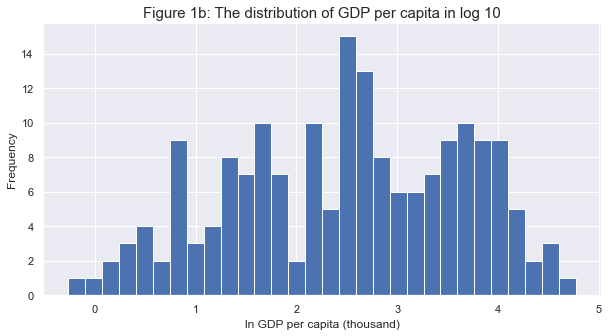

In [25]:
df['log_gdp'].hist(figsize=(10,5),bins=30)
plt.title("Figure 1b: The distribution of GDP per capita in log 10", fontsize=15) 
plt.xlabel("ln GDP per capita (thousand)", fontsize=12) 
plt.ylabel("Frequency", fontsize=12)

When we take the natural log of GDP per capita, the distribution is close to symmetric (Figure 1b). There are two countries with less than one thousand dollars of GDP per capita (Burundi and the Central African Republic), their log GDP per capita value is less than zero. The average of log GDP per capita is 2.49 in this data, its median is 2.57, suggesting a fairly symmetric distribution. The standard deviation is 1.15.

In [26]:
sorted_by_gdppc.tail()

,Year,Country Name,Life_expectancy,Population (million),GDP_per_capita (thousand),log_gdp
Country Code,,,,,,
NER,2020,Niger,62.792,24.206636,1.288259,0.253291
SOM,2020,Somalia,57.697,15.893219,1.245744,0.219733
COD,2020,"Congo, Dem. Rep.",60.971,89.561404,1.141819,0.132623
CAF,2020,Central African Republic,53.679,4.829764,0.987645,-0.012432
BDI,2020,Burundi,61.916,11.890781,0.771163,-0.259855


### Figure 2 Life expectancy and GDP per capita

(a) Life expectancy and (GDP per capita)

'The preceding screenshot shows a strong correlation between these two variables. However, there are some outliers that we can easily spot from the graph'

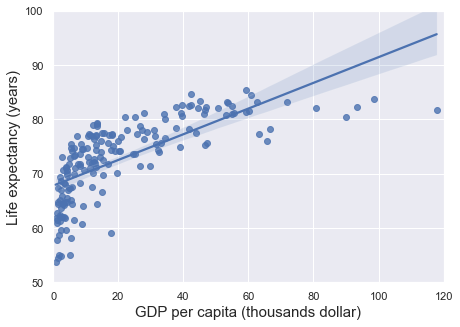

In [27]:
plt.figure(figsize=(7, 5))
sns.regplot(df['GDP_per_capita (thousand)'], df['Life_expectancy'])
plt.xlabel("GDP per capita (thousands dollar)", fontsize=15) 
plt.ylabel("Life expectancy (years)", fontsize=15) 
plt.axis([0, 120, 50, 100])

"The preceding screenshot shows a strong correlation between these two variables. However, there are some outliers that we can easily spot from the graph"

Figure 2a shows the results of a linear regression with life expectancy as the y variable, and GDP per capita as the x variable. This regression shows a positive slope, but the scatterplot implies that there are strong nonlinearities in the association that the linear regression doesn’t capture. In particular, the slope appears a lot steeper at lower levels of GDP per capita and a lot flatter at higher levels. Thus, the linear regression does not capture the shape of the pattern, and because of the skewed distribution of the x variable, it is not a very good approximation of the average of that nonlinear pattern either.

(b) Life expectancy and ln (GDP per capita)

(-0.5, 5.0, 50.0, 85.0)

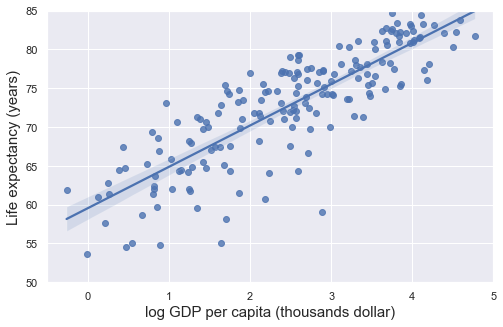

In [28]:
plt.figure(figsize=(8, 5))
sns.regplot(df['log_gdp'],df['Life_expectancy'])
plt.xlabel("log GDP per capita (thousands dollar)", fontsize=15) 
plt.ylabel("Life expectancy (years)", fontsize=15) 
plt.axis([-0.5, 5, 50, 85])

Figure 8.5a shows the same regression with the natural log of GDP per capita as the x variable. In contrast with the 
regression without taking logs, the scatterplot with log GDP per capita suggests a remarkably linear pattern.
For most of the range of log GDP per capita, the linear fit appears to be a good approximation
of the conditional expectation.

In [30]:
import cufflinks as cf
import plotly.offline
cf.go_offline()
cf.set_config_file(offline=False,
world_readable=True)

In [62]:
'''
plt.figure(figsize=(8, 5))
plt.axis([-0.5, 5, 50, 85])
'''
df.iplot(x='log_gdp',
                                       y='Life_expectancy',
                                       text='Country Name',
                                       bestfit=True,
                                       mode='markers',
                                       xTitle='log GDP per capita (thousands dollar',
                                       yTitle='Life expectancy (years)',
        colors = 'blue')